In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\Priya Sharma\OneDrive\Desktop\GlobalCert\Week 2\LinkedIn_Extraction.csv")
df.head(1)

,id,Full name,Email,Profile url,First name,Last name,Title,Skills,Relocation,Passed out year,Notice period in days,Organisation,Salary
0,anukansha-gagneja,Anukansha Gagneja,NaN,https://www.linkedin.com/in/anukansha-gagneja/,Anukansha,Gagneja,front end developer,"react, angular, frame works, problem solving s...",Yes,2011,0-30,PricewaterhouseCoopers - Service Delivery Cent...,700000


In [3]:
df.shape

(150, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     150 non-null    object 
 1   Full name              150 non-null    object 
 2   Email                  0 non-null      float64
 3   Profile url            150 non-null    object 
 4   First name             150 non-null    object 
 5   Last name              150 non-null    object 
 6   Title                  150 non-null    object 
 7   Skills                 149 non-null    object 
 8   Relocation             150 non-null    object 
 9   Passed out year        150 non-null    int64  
 10  Notice period in days  146 non-null    object 
 11  Organisation           128 non-null    object 
 12  Salary                 150 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 15.4+ KB


<AxesSubplot:>

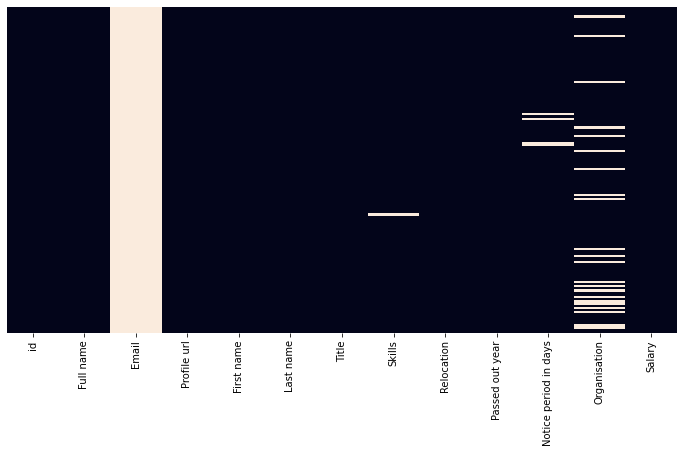

In [5]:
plt.figure(figsize=[12, 6])
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

### Observations:
1. Whole Email column is empty
2. Skills, Notice period in days also have some empty values
3. We will be dropping Full name, Email, First name, Last name columns

## Droping the unnecessary columns:

In [6]:
df.drop(['Full name', 'Email', 'First name', 'Last name'], axis=1, inplace=True)

In [7]:
df.head(2)

,id,Profile url,Title,Skills,Relocation,Passed out year,Notice period in days,Organisation,Salary
0,anukansha-gagneja,https://www.linkedin.com/in/anukansha-gagneja/,front end developer,"react, angular, frame works, problem solving s...",Yes,2011,0-30,PricewaterhouseCoopers - Service Delivery Cent...,700000
1,jasmeet-kaur-gambhir-60b102108,https://www.linkedin.com/in/jasmeet-kaur-gambh...,interior designer,"autocad, 3ds max, sketchup",Yes,2019,0-30,BDO Rise,400000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     150 non-null    object
 1   Profile url            150 non-null    object
 2   Title                  150 non-null    object
 3   Skills                 149 non-null    object
 4   Relocation             150 non-null    object
 5   Passed out year        150 non-null    int64 
 6   Notice period in days  146 non-null    object
 7   Organisation           128 non-null    object
 8   Salary                 150 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 10.7+ KB


## Renaming the columns:

In [9]:
df.columns

Index(['id', 'Profile url', 'Title', 'Skills', 'Relocation', 'Passed out year',
       'Notice period in days', 'Organisation', 'Salary'],
      dtype='object')

In [10]:
renaming_columns = ['id', 'Profile_url', 'Title', 'Skills', 'Relocation', 'Passed_out_year', 'Notice_period_in_days', 'Organisation', 'Salary']

In [11]:
df.columns = renaming_columns

In [12]:
df.head()

,id,Profile_url,Title,Skills,Relocation,Passed_out_year,Notice_period_in_days,Organisation,Salary
0,anukansha-gagneja,https://www.linkedin.com/in/anukansha-gagneja/,front end developer,"react, angular, frame works, problem solving s...",Yes,2011,0-30,PricewaterhouseCoopers - Service Delivery Cent...,700000
1,jasmeet-kaur-gambhir-60b102108,https://www.linkedin.com/in/jasmeet-kaur-gambh...,interior designer,"autocad, 3ds max, sketchup",Yes,2019,0-30,BDO Rise,400000
2,ritika-sharma-7a70bb107,https://www.linkedin.com/in/ritika-sharma-7a70...,security engineer,"c++, java, node, power shell, python",No,2020,30-45,MGO (Macias Gini & O'Connell LLP),700000
3,sumer-batra-bb6938120,https://www.linkedin.com/in/sumer-batra-bb6938...,back end developer,"html, css, java script, Django",No,2017,0-30,PwC India,730000
4,yashi-rai-2bb619109,https://www.linkedin.com/in/yashi-rai-2bb619109/,interior designer,"autocad, 3ds max, sketchup",Yes,2016,0-30,NaN,400000


In [13]:
df['Experience'] = 2022 - df['Passed_out_year']

In [14]:
from sklearn.model_selection import train_test_split
trainDf, testDf = train_test_split(df, train_size=0.8, random_state = 150)

In [15]:
trainDf['Source'] = "Train"
testDf['Source'] = "Test"

In [16]:
df=pd.concat([trainDf, testDf], axis = 0)

In [17]:
df.shape

(150, 11)

In [18]:
df.columns

Index(['id', 'Profile_url', 'Title', 'Skills', 'Relocation', 'Passed_out_year',
       'Notice_period_in_days', 'Organisation', 'Salary', 'Experience',
       'Source'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 72 to 88
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     150 non-null    object
 1   Profile_url            150 non-null    object
 2   Title                  150 non-null    object
 3   Skills                 149 non-null    object
 4   Relocation             150 non-null    object
 5   Passed_out_year        150 non-null    int64 
 6   Notice_period_in_days  146 non-null    object
 7   Organisation           128 non-null    object
 8   Salary                 150 non-null    int64 
 9   Experience             150 non-null    int64 
 10  Source                 150 non-null    object
dtypes: int64(3), object(8)
memory usage: 14.1+ KB


## NaN Values Imputation

In [20]:
df['Notice_period_in_days'] = df['Notice_period_in_days'].fillna(df['Notice_period_in_days'].mode()[0])
df['Skills'] = df['Skills'].fillna(df['Skills'].mode()[0]) 
df.Organisation.fillna(value='Not_given', inplace=True)
#df['Organisation'] = df['Organisation'].fillna(df['Organisation'].mode()[0])

<AxesSubplot:>

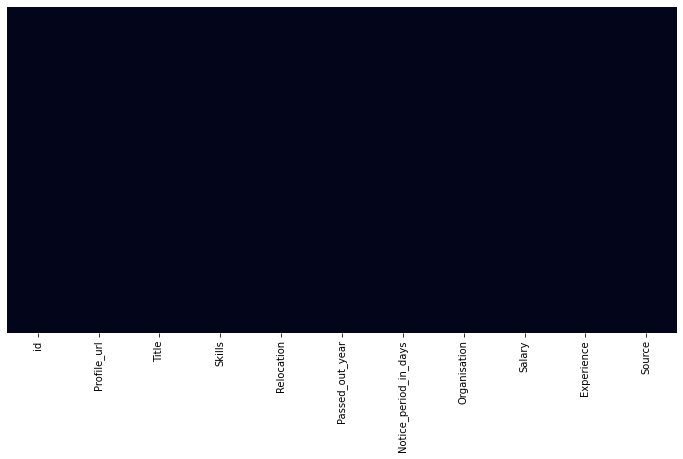

In [21]:
plt.figure(figsize=[12, 6])
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 72 to 88
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     150 non-null    object
 1   Profile_url            150 non-null    object
 2   Title                  150 non-null    object
 3   Skills                 150 non-null    object
 4   Relocation             150 non-null    object
 5   Passed_out_year        150 non-null    int64 
 6   Notice_period_in_days  150 non-null    object
 7   Organisation           150 non-null    object
 8   Salary                 150 non-null    int64 
 9   Experience             150 non-null    int64 
 10  Source                 150 non-null    object
dtypes: int64(3), object(8)
memory usage: 14.1+ KB


## Checking unique values:

In [23]:
colo = ['id',
 'Profile_url',
 'Title',
 'Relocation',
 'Passed_out_year',
 'Notice_period_in_days',
  'Organisation',
 'Experience','Salary']

In [24]:
for i in colo:
    print('Unique values in dataframe', i, 'is=', len(np.unique(df[i])))

Unique values in dataframe id is= 150
Unique values in dataframe Profile_url is= 150
Unique values in dataframe Title is= 12
Unique values in dataframe Relocation is= 2
Unique values in dataframe Passed_out_year is= 14
Unique values in dataframe Notice_period_in_days is= 5
Unique values in dataframe Organisation is= 94
Unique values in dataframe Experience is= 14
Unique values in dataframe Salary is= 20


## Checking Data

In [25]:
df.Title.value_counts()

front end developer       26
back end developer        24
security engineer         18
sales associate           16
data analyst              14
data scientist             9
envirnomental engineer     9
architecture               8
interior designer          8
mechanical engineer        8
civil engineer             8
associate                  2
Name: Title, dtype: int64

In [26]:
df.Relocation.value_counts()

Yes    131
No      19
Name: Relocation, dtype: int64

In [27]:
df.Experience.min()

0

In [28]:
df.Experience.max()

20

In [29]:
df.Passed_out_year.value_counts().sort_index()

2002     1
2010     1
2011     1
2012     2
2013     2
2014     1
2015     2
2016    23
2017    14
2018    14
2019    10
2020    45
2021    33
2022     1
Name: Passed_out_year, dtype: int64

In [30]:
df.Notice_period_in_days.value_counts().sort_index()

0        18
0-30     88
30-45    19
45-60    20
60-90     5
Name: Notice_period_in_days, dtype: int64

In [31]:
df.Organisation.value_counts().sort_values()

Google / WNS        1
GLA University      1
Capgemini           1
Dav kathua          1
The Hummingbird     1
                   ..
Accenture           4
PwC India           6
PwC                 6
EY                  8
Not_given          22
Name: Organisation, Length: 94, dtype: int64

# Visualization:

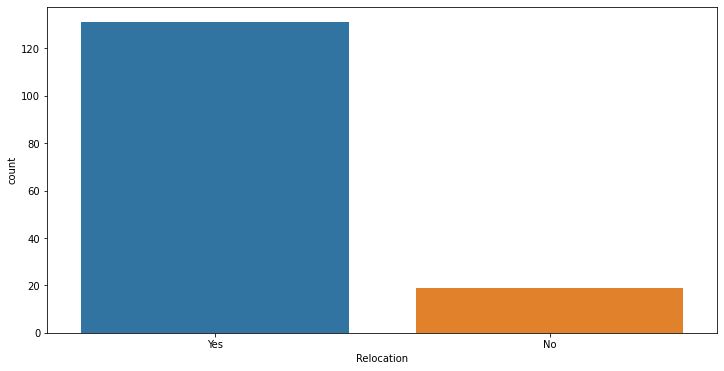

In [32]:
plt.figure(figsize=[12, 6])
sns.countplot(x="Relocation", data=df)
plt.show()

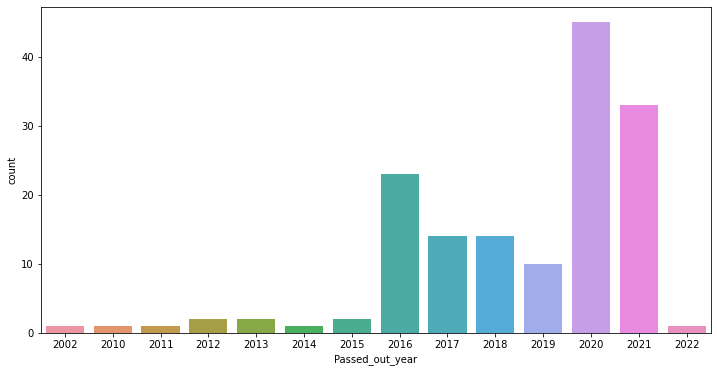

In [33]:
plt.figure(figsize=[12, 6])
sns.countplot(x="Passed_out_year", data=df)
plt.show()

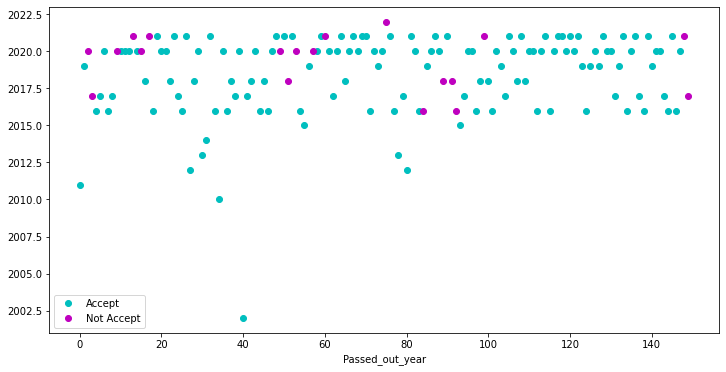

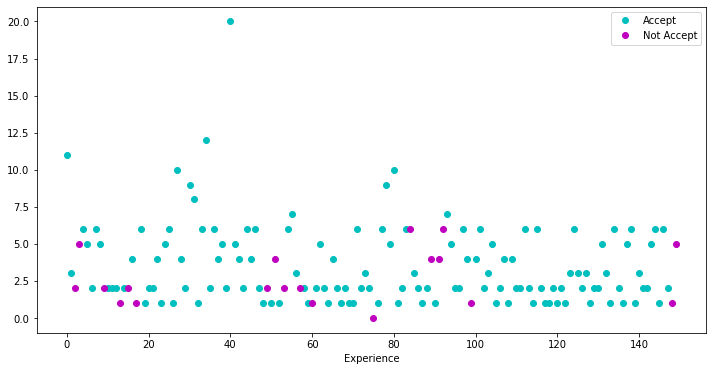

In [34]:
column = ['Passed_out_year', 'Experience']

for i in column:
    plt.figure(figsize=[12,6])
    plt.plot(i, data=df[df.Relocation == 'Yes'], c='c', marker="o", ms=6, ls='', label='Accept')
    plt.plot(i, data=df[df.Relocation == 'No'], c='m', marker="o", ms=6, ls='', label='Not Accept')
    plt.legend()
    plt.xlabel(i)
    plt.show()

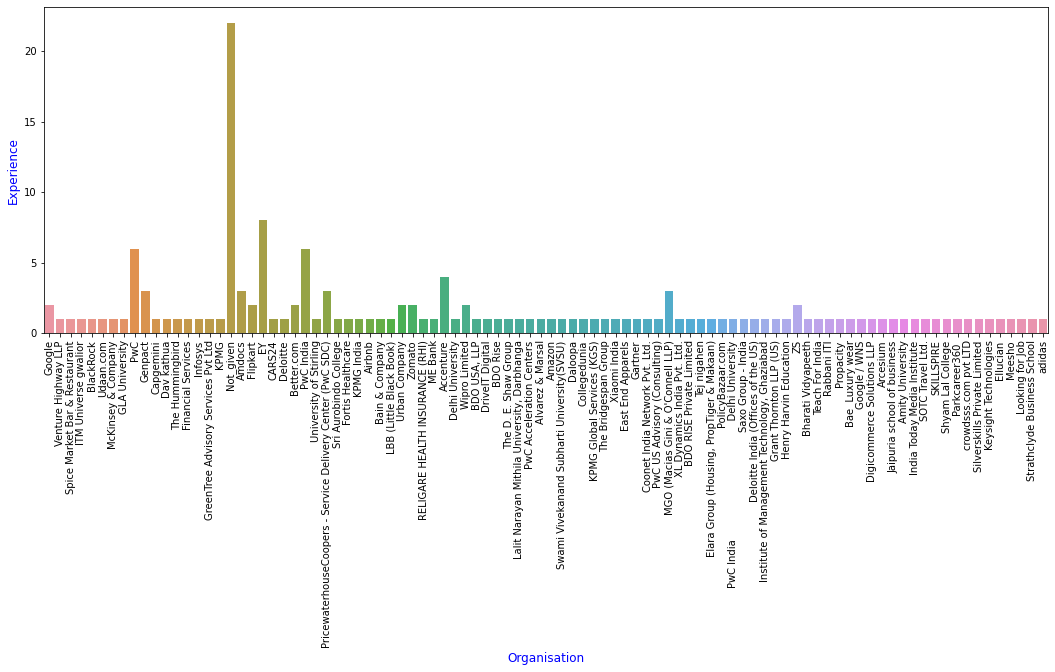

In [35]:
plt.figure(figsize=[18, 6])
sns.countplot(x='Organisation', data=df)
plt.xlabel('Organisation', fontsize=12, c='b')
plt.ylabel("Experience", fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x432 with 0 Axes>

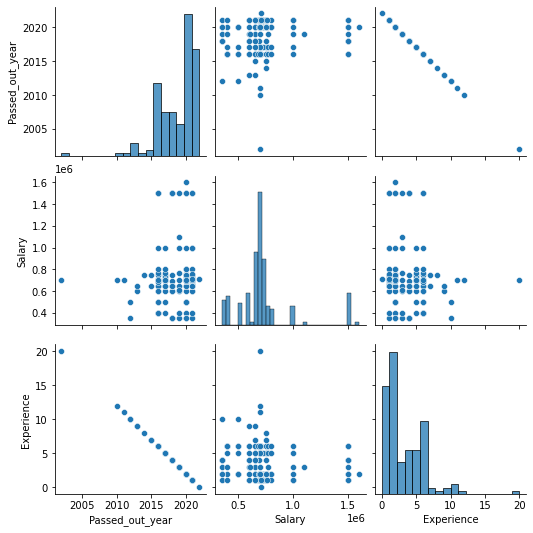

In [36]:
plt.figure(figsize=[12, 6])
sns.pairplot(df)
plt.show()

In [37]:
df.head()

,id,Profile_url,Title,Skills,Relocation,Passed_out_year,Notice_period_in_days,Organisation,Salary,Experience,Source
72,belwalchitra,https://www.linkedin.com/in/belwalchitra/,back end developer,"html, css, java script, Django",Yes,2020,0,Google,750000,2,Train
84,ankita-balotia1792,https://www.linkedin.com/in/ankita-balotia1792/,front end developer,"react, angular, frame works, problem solving s...",No,2016,0-30,Venture Highway LLP,700000,6,Train
21,jaya-makkar-b36209145,https://www.linkedin.com/in/jaya-makkar-b36209...,front end developer,"react, angular, frame works, problem solving s...",Yes,2020,0-30,Spice Market Bar & Restaurant,700000,2,Train
43,navdeep-singh-kaurav-a851a7100,https://www.linkedin.com/in/navdeep-singh-kaur...,back end developer,"html, css, java script, Django",Yes,2020,0-30,ITM Universe gwalior,750000,2,Train
85,ajay-kaushik-214322119,https://www.linkedin.com/in/ajay-kaushik-21432...,security engineer,"c++, java, node, power shell, python",Yes,2019,0-30,BlackRock,650000,3,Train


In [38]:
z = df['Skills']
z[0]

'react, angular, frame works, problem solving skills'

In [39]:
z = df['Skills']
skill_list =[]
for i in z:
    a=i.split(',')
    for j in a:
        if j not in skill_list:
            skill_list.append(j)

In [40]:
df.head(2)

,id,Profile_url,Title,Skills,Relocation,Passed_out_year,Notice_period_in_days,Organisation,Salary,Experience,Source
72,belwalchitra,https://www.linkedin.com/in/belwalchitra/,back end developer,"html, css, java script, Django",Yes,2020,0,Google,750000,2,Train
84,ankita-balotia1792,https://www.linkedin.com/in/ankita-balotia1792/,front end developer,"react, angular, frame works, problem solving s...",No,2016,0-30,Venture Highway LLP,700000,6,Train


In [41]:
df.columns

Index(['id', 'Profile_url', 'Title', 'Skills', 'Relocation', 'Passed_out_year',
       'Notice_period_in_days', 'Organisation', 'Salary', 'Experience',
       'Source'],
      dtype='object')

In [42]:
corrDf = df[df["Source"] == "Train"].corr()

In [43]:
corrDf

,Passed_out_year,Salary,Experience
Passed_out_year,1.000000,0.107033,-1.000000
Salary,0.107033,1.000000,-0.107033
Experience,-1.000000,-0.107033,1.000000


<AxesSubplot:>

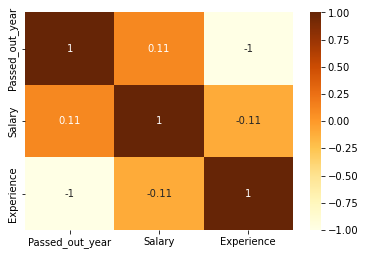

In [44]:
sns.heatmap(corrDf, 
        xticklabels=corrDf.columns,
        yticklabels=corrDf.columns, cmap='YlOrBr', annot=True)

In [45]:
categoricalVars = trainDf.columns[trainDf.dtypes == object]
categoricalVars

Index(['id', 'Profile_url', 'Title', 'Skills', 'Relocation',
       'Notice_period_in_days', 'Organisation', 'Source'],
      dtype='object')

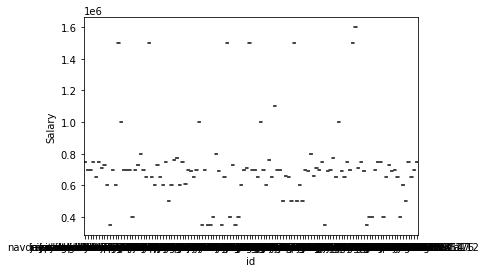

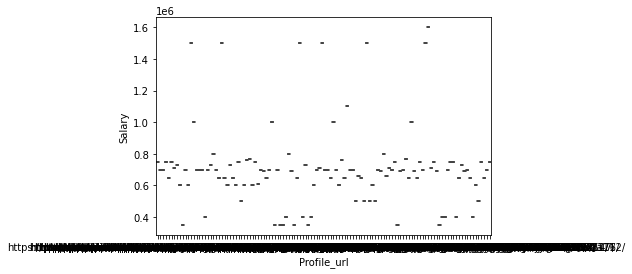

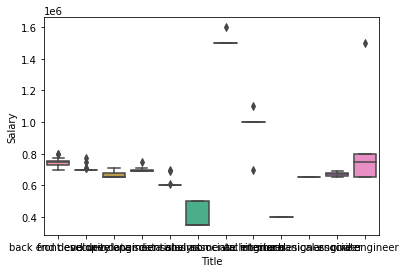

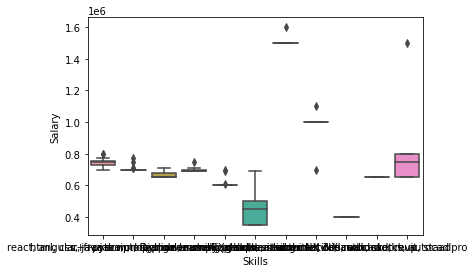

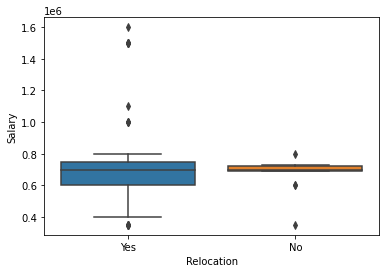

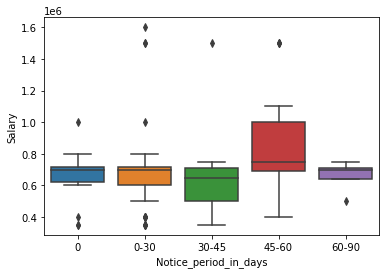

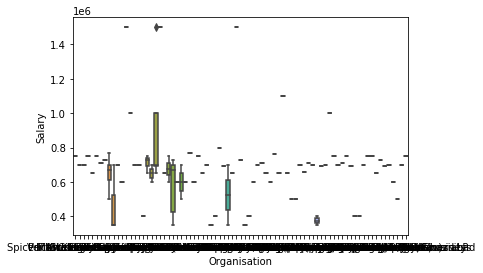

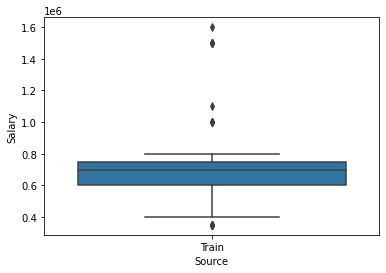

In [46]:
from matplotlib.pyplot import figure
for colName in categoricalVars:
    figure()    
    sns.boxplot(y = trainDf["Salary"], x = trainDf[colName])

In [46]:
df2 = pd.get_dummies(df, drop_first = True)

In [47]:
from statsmodels.api import add_constant
df2 = add_constant(df2)
df2.shape

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(150, 422)

In [48]:
df.shape

(150, 11)

In [49]:
testDf=df2[(df2['Source_Train'] == 0)]
trainDf=df2[(df2['Source_Train'] == 1)]

In [50]:
trainX = trainDf.drop(['Salary'], axis = 1).copy()
trainY = trainDf['Salary'].copy()
testX = testDf.drop(['Salary'], axis = 1).copy()
testY = testDf['Salary'].copy()

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

tempMaxVIF = 5 # The VIF that will be calculated at EVERY iteration in while loop
maxVIFCutoff = 5 # 5 is recommended cutoff value for linear regression
trainXCopy = trainX.copy()
counter = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIFCutoff):
    
    print(counter)
    
    # Create an empty temporary df to store VIF values
    tempVIFDf = pd.DataFrame()
    
    # Calculate VIF using list comprehension
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    # Create a new column "Column_Name" to store the col names against the VIF values from list comprehension
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    # Drop NA rows from the df - If there is some calculation error resulting in NAs
    tempVIFDf.dropna(inplace=True)
    
    # Sort the df based on VIF values, then pick the top most column name (which has the highest VIF)
    tempColumnName = tempVIFDf.sort_values(["VIF"], ascending = False).iloc[0,1]
    # tempColumnName = tempVIFDf.sort_values(["VIF"], ascending = True)[-1:]["Column_Name"].values[0]
    
    # Store the max VIF value in tempMaxVIF
    tempMaxVIF = tempVIFDf.sort_values(["VIF"], ascending = False).iloc[0,0]
    # tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    
    print(tempColumnName)
    
    if (tempMaxVIF >= maxVIFCutoff): # This condition will ensure that columns having VIF lower than 5 are NOT dropped
        
        # Remove the highest VIF valued "Column" from trainXCopy. As the loop continues this step will keep removing highest VIF columns one by one 
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName)
    
    counter = counter + 1

1


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Profile_url_https://www.linkedin.com/in/kgeetika/
2
Profile_url_https://www.linkedin.com/in/khyati-bhardwaj-347615a5/
3
Profile_url_https://www.linkedin.com/in/kartika15/
4
Profile_url_https://www.linkedin.com/in/kritigupta29/
5
Profile_url_https://www.linkedin.com/in/karansinghania/
6
Profile_url_https://www.linkedin.com/in/kritika-pandya-38612462/
7
Profile_url_https://www.linkedin.com/in/kamaal-hassan-a0a616159/
8
Profile_url_https://www.linkedin.com/in/kritika-thapar-66a82b168/
9
Profile_url_https://www.linkedin.com/in/kajol-dhyani-053b5352/
10
Profile_url_https://www.linkedin.com/in/kunal-dua-7b2a2a148/
11
Profile_url_https://www.linkedin.com/in/jaya-makkar-b36209145/
12
Profile_url_https://www.linkedin.com/in/madhu-sharma-21864a136/
13
Profile_url_https://www.linkedin.com/in/jasmeet-kaur-gambhir-60b102108/
14
Profile_url_https://www.linkedin.com/in/manoj-yadav-52512b38/
15
Profile_url_https://www.linkedin.com/in/indrajeet-kumar-174913164/
16
Profile_url_https://www.linkedin.com/i

Title_back end developer
139
id_shweta-thakur-3aaa07165
140
Title_civil engineer
141
id_shweta-kurda-267163b6
142
Title_data analyst
143
id_shreya-sachdeva-129025121
144
Title_data scientist
145
id_shivani-bisht-0b89991a2
146
Title_envirnomental engineer
147
id_shefali-sharma-ba036a146
148
Title_front end developer
149
id_sejal-gera-3b973518a
150
Title_interior designer
151
id_saurabh-sharma-55a59810b
152
Title_mechanical engineer
153
id_saumya-singh-36b54953
154
Title_sales associate
155
id_sandeep-sharma-3b55b2175
156
Title_security engineer
157
id_sakshiarora0826
158
Skills_RX roads, solid works, NX cad
159
id_sakshi-chauhan-693847157
160
Skills_autocad, 3ds max, sketchup
161
id_sakshi-aggarwal-1b3528143
162
Skills_autocad, revit, staadpro
163
id_sahilkathuria14
164
Skills_c++, java, node, power shell, python
165
id_rupina-kukreja-77343a13a
166
Skills_communication, customer service
167
id_rock2avi
168
id_riya-soi-28a404145
169
Organisation_Tej nigahen
170
Organisation_Sri Aurobindo

In [53]:
highVIFColumnNames

['Profile_url_https://www.linkedin.com/in/kgeetika/',
 'Profile_url_https://www.linkedin.com/in/khyati-bhardwaj-347615a5/',
 'Profile_url_https://www.linkedin.com/in/kartika15/',
 'Profile_url_https://www.linkedin.com/in/kritigupta29/',
 'Profile_url_https://www.linkedin.com/in/karansinghania/',
 'Profile_url_https://www.linkedin.com/in/kritika-pandya-38612462/',
 'Profile_url_https://www.linkedin.com/in/kamaal-hassan-a0a616159/',
 'Profile_url_https://www.linkedin.com/in/kritika-thapar-66a82b168/',
 'Profile_url_https://www.linkedin.com/in/kajol-dhyani-053b5352/',
 'Profile_url_https://www.linkedin.com/in/kunal-dua-7b2a2a148/',
 'Profile_url_https://www.linkedin.com/in/jaya-makkar-b36209145/',
 'Profile_url_https://www.linkedin.com/in/madhu-sharma-21864a136/',
 'Profile_url_https://www.linkedin.com/in/jasmeet-kaur-gambhir-60b102108/',
 'Profile_url_https://www.linkedin.com/in/manoj-yadav-52512b38/',
 'Profile_url_https://www.linkedin.com/in/indrajeet-kumar-174913164/',
 'Profile_url_h

In [54]:
from statsmodels.api import OLS
m1 = OLS(trainY, trainX) 
m1 = m1.fit()

In [55]:
m1.summary() 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1452: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 08 Apr 2022   Prob (F-statistic):                nan
Time:                        18:13:51   Log-Likelihood:                 1808.5
No. Observations:                 120   AIC:                            -3377.
Df Residuals:                       0   BIC:                            -3042.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            0.7088        inf          0        nan         nan         nan
Passed_out_year                                                                356.1936        inf          0        nan         nan         nan
Experience                                                                    1077.0184        inf          0        nan         nan         nan
id_aarzoo-mittal-214553170                                                    6216.0820        inf          0        nan         nan         nan
id_aashi-gaur                                                                -1.583e+04        inf         -0        nan         nan         nan
id_aayush-gupta-a05a70169                                                    -1.531e+04        inf         -0        nan         nan         nan
id_abdal-lalit                                                               -1.821e+04        inf         -0        nan         nan         nan
id_abhibhardwaj7                                                              6.434e+04        inf          0        nan         nan         nan
id_abhishek-j-344642140                                                      -1.844e+04        inf         -0        nan         nan         nan
id_adityakohli1                                                              -7171.6791        inf         -0        nan         nan         nan
id_ajay-kaushik-214322119                                                    -5128.0566        inf         -0        nan         nan         nan
id_ajay-kumar-4736831b2                                                      -1506.2482        inf         -0        nan         nan         nan
id_akanksha-choudhary-43a2b3131                                               6.442e-11        inf          0        nan         nan         nan
id_akash-nambiar-337756160                                                    4.679e-11        inf          0        nan         nan         nan
id_akshay-kumar-17601a112                                                    -2471.9345        inf         -0        nan         nan         nan
id_akshaybabbar12                                                             6623.7296        inf          0        nan         nan         nan
id_alankrita-gangwar-b68b9615                                                -6.783e-11        inf         -0        nan         nan         nan
id_ali-sharma-12218822                                                        5.808e-12        inf          0        nan         nan         nan
id_amar-tyagi-250b91176               

In [56]:
Test_Pred = m1.predict(testX)

In [57]:
(np.mean(np.abs(((testY - Test_Pred)/testY))))*100

8.602291549907232

In [71]:
from sklearn.metrics import mean_absolute_percentage_error

In [67]:
mean_absolute_percentage_error(Test_Pred,testY)

0.09656151961858314

In [79]:
rms = mean_squared_error(Test_Pred,testY, squared=False)

In [80]:
rms

139251.4898718247

## DecisionTree

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [59]:
M1 = DecisionTreeRegressor(random_state = 123).fit(trainX, trainY) # Indep, Dep
testPrediction = M1.predict(testX)

In [77]:
rms = mean_squared_error(testY, testPrediction, squared=False)

In [78]:
rms

164215.30582338135

In [68]:
mean_absolute_percentage_error(testPrediction,testY)

0.0921716452561523

## RandomForest

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
M2 = RandomForestRegressor(random_state = 123).fit(trainX, trainY) # Indep, Dep
testPrediction = M2.predict(testX)

In [84]:
mean_absolute_percentage_error(testPrediction,testY)

0.09106584954436192